# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units='imperial'
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng =city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | salina cruz
Processing Record 7 of Set 1 | matara
Processing Record 8 of Set 1 | sampit
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | kununurra
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | luorong
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | lasa
Processing Record 16 of Set 1 | bosaso
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | macon
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | marechal candido rondon
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | namibe
Pro

In [65]:
import json

In [67]:
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 36
    },
    "cod": 200,
    "coord": {
        "lat": 44.0213,
        "lon": 144.2697
    },
    "dt": 1667767596,
    "id": 2130741,
    "main": {
        "feels_like": 27.88,
        "grnd_level": 1021,
        "humidity": 76,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 33.94,
        "temp_max": 33.94,
        "temp_min": 33.94
    },
    "name": "Abashiri",
    "sys": {
        "country": "JP",
        "id": 20157,
        "sunrise": 1667768793,
        "sunset": 1667804796,
        "type": 2
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 238,
        "gust": 9.28,
        "speed": 6.93
    }
}


In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [11]:
# Display sample data
# city_data_df= 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,72.54,80,76,1.01,US,1667767199
1,ilulissat,69.2167,-51.1000,-0.56,94,40,6.89,GL,1667767396
2,qaanaaq,77.4840,-69.3632,2.53,91,100,2.86,GL,1667767396
3,tuktoyaktuk,69.4541,-133.0374,6.80,85,100,10.36,CA,1667767397
4,jamestown,42.0970,-79.2353,71.24,60,75,13.80,US,1667767301


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,72.54,80,76,1.01,US,1667767199
1,ilulissat,69.2167,-51.1000,-0.56,94,40,6.89,GL,1667767396
2,qaanaaq,77.4840,-69.3632,2.53,91,100,2.86,GL,1667767396
3,tuktoyaktuk,69.4541,-133.0374,6.80,85,100,10.36,CA,1667767397
4,jamestown,42.0970,-79.2353,71.24,60,75,13.80,US,1667767301


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

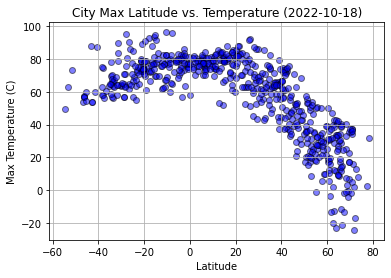

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df['Max Temp'],marker = 'o', color='b', edgecolors='black',alpha=.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

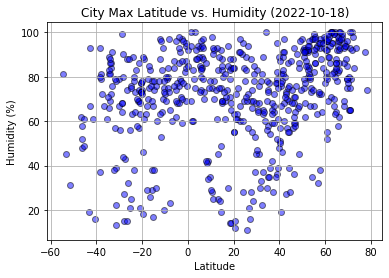

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df['Humidity'],marker = 'o', color='b', edgecolors='black',alpha=.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

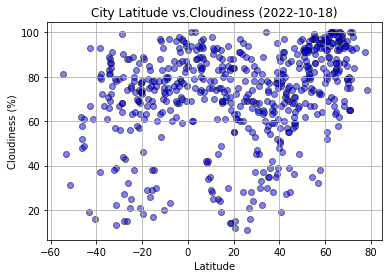

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df['Humidity'],marker = 'o', color='b', edgecolors='black',alpha=.5)
# Incorporate the other graph properties
plt.title('City Latitude vs.Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

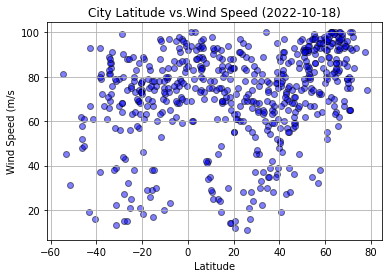

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df['Humidity'],marker = 'o', color='b', edgecolors='black',alpha=.5)

# Incorporate the other graph properties
plt.title('City Latitude vs.Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
from sklearn import datasets

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,72.54,80,76,1.01,US,1667767199
1,ilulissat,69.2167,-51.1000,-0.56,94,40,6.89,GL,1667767396
2,qaanaaq,77.4840,-69.3632,2.53,91,100,2.86,GL,1667767396
3,tuktoyaktuk,69.4541,-133.0374,6.80,85,100,10.36,CA,1667767397
4,jamestown,42.0970,-79.2353,71.24,60,75,13.80,US,1667767301


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,sampit,-2.5333,112.9500,73.29,97,100,4.25,ID,1667767398
8,new norfolk,-42.7826,147.0587,53.71,67,27,2.57,AU,1667767398
9,kununurra,-15.7667,128.7333,76.98,78,11,0.00,AU,1667767398
11,ushuaia,-54.8000,-68.3000,49.62,81,75,8.05,AR,1667767338
13,chuy,-33.6971,-53.4616,63.48,72,15,11.45,UY,1667767400


###  Temperature vs. Latitude Linear Regression Plot

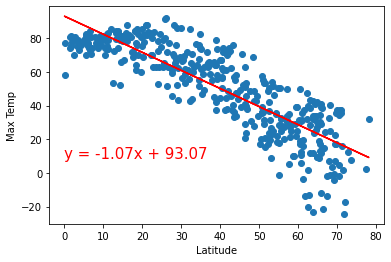

The r-value is: -0.8438463196001779


In [56]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values =northern_hemi_df['Max Temp']


(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f'The r-value is: {rvalue}')

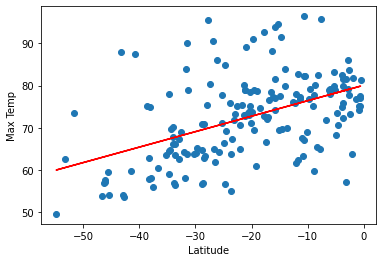

The r-value is: 0.4767477915435858


In [58]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values =southern_hemi_df['Max Temp']

(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

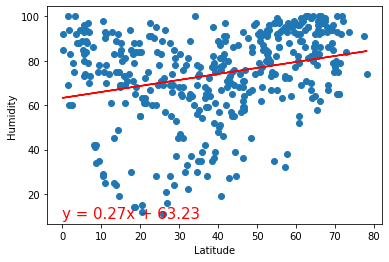

The r-value is: 0.2712256228125411


In [59]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values =northern_hemi_df['Humidity']


(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f'The r-value is: {rvalue}')

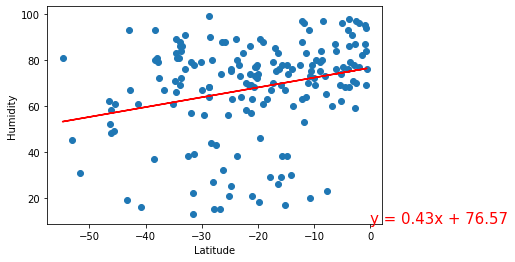

The r-value is: 0.2629950162070725


In [60]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values =southern_hemi_df['Humidity']

(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

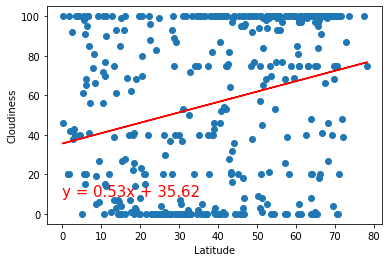

The r-value is: 0.26503122399935


In [61]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values =northern_hemi_df['Cloudiness']


(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f'The r-value is: {rvalue}')

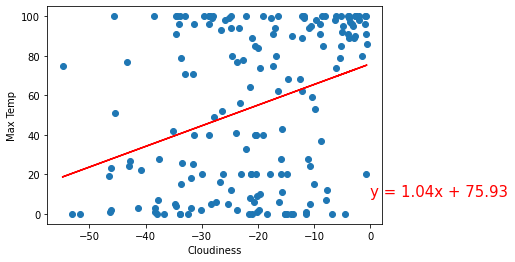

The r-value is: 0.3371938483168696


In [53]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values =southern_hemi_df['Cloudiness']

(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

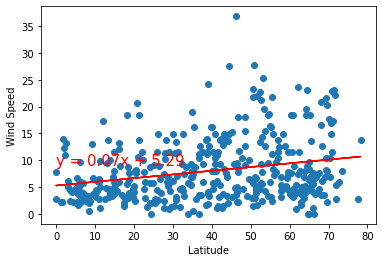

The r-value is: 0.24499118023726815


In [62]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values =northern_hemi_df['Wind Speed']


(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f'The r-value is: {rvalue}')

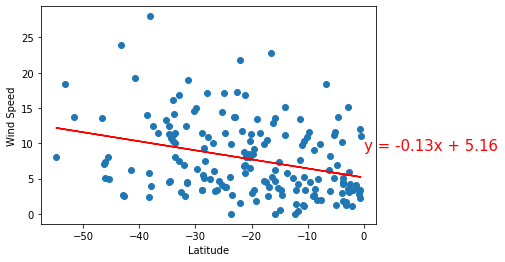

The r-value is: -0.3134716431108616


In [63]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values =southern_hemi_df['Wind Speed']

(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE